In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
import catboost as cat
import xgboost as xgb
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = os.path.join('/', 'data', 'pik_competition', 'sev')
# path = '/home/pik/workspace/python_projects/machine_learning/data'
train_path = os.path.join(path, 'xtrain.csv')
test_path = os.path.join(path, 'xtest.csv')
y_train_path = os.path.join(path, 'ytrain.csv')


X_train_df = pd.read_csv(train_path, header=0)
# X_test_df = pd.read_csv(test_path, header=0)
y_train_df = pd.read_csv(y_train_path, header=0)

In [3]:
X_train_df.shape

(900000, 58)

In [4]:
X_train_df['label'] = y_train_df
X_df = X_train_df.dropna(how='any').copy()
y_df = X_df['label']
X_df = X_df.drop('label', axis=1)

In [5]:
X_df.shape

(2462, 58)

In [8]:
X_df.head().T

,72,238,384,764,1566
1,209.606526,47.849207,-165.215629,-16.329755,-29.210591
2,12.000000,12.000000,13.000000,12.000000,13.000000
3,12.000000,11.000000,10.000000,9.000000,12.000000
4,32.552570,54.547042,2.627286,-16.914013,3.017234
5,0.000000,0.000000,0.000000,0.000000,1.000000
6,2.000000,2.000000,2.000000,2.000000,3.000000
7,23.000000,23.000000,24.000000,23.000000,23.000000
8,-75.465409,-71.092011,-22.863169,-36.600166,-47.469785
9,7.000000,8.000000,7.000000,9.000000,8.000000
10,1.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
unique = X_df.nunique()
dumming_indexes = unique[unique < 20].index
undumming_indexes = unique[unique > 20].index

In [7]:
X_df = pd.get_dummies(X_df, columns=dumming_indexes)

In [8]:
X_scal = X_df[undumming_indexes]

scaler = StandardScaler()
X_scal = scaler.fit_transform(X_scal)

X_scal = pd.DataFrame(X_scal, columns=undumming_indexes)

In [9]:
X_df.drop(undumming_indexes, axis=1, inplace=True)

In [10]:
X_df.index = [i for i in range(X_df.shape[0])]

X_scal.index = [i for i in range(X_df.shape[0])]

X = pd.concat([X_df, X_scal], axis=1).copy()

In [11]:
X = X.values
y = y_df.values.ravel()

X, X_val, y, y_val = train_test_split(X, y, shuffle=True, random_state=241)

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=241)

In [14]:
train_scores = list()
test_scores = list()

# params = [0.1, 1, 10, 50, 100, 150, 200, 250, 1000, 10000, 1000000]
params = [10, 25, 50, 100, 150, 200]


for param in params:
    f_train_scores = list()
    f_test_scores = list()
    for train_index, test_index in kf.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        
        # model = SVC(C=param, kernel='linear', random_state=1)
        model = GradientBoostingClassifier(n_estimators=param, random_state=42)
        model.fit(X_train, y_train)
        f_train_scores.append(roc_auc_score(y_train, model.predict(X_train)))
        f_test_scores.append(roc_auc_score(y_test, model.predict(X_test)))
    
    print(np.array(f_train_scores).mean())
    print(np.array(f_test_scores).mean())
        
    train_scores.append(np.array(f_train_scores).mean())
    test_scores.append(np.array(f_test_scores).mean())

0.5120891168395352
0.4976961346728789
0.5412741287512854
0.4983843283383925
0.5989018129060069
0.49907464935365187
0.699385741511082
0.5041586782599496
0.7808456435380593
0.5045644173505515
0.8532272050527258
0.5115296633809213


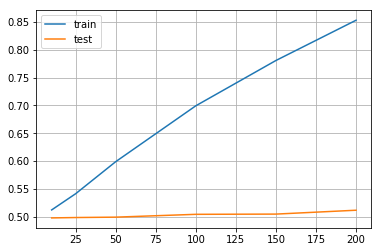

In [15]:
plt.plot(params, train_scores, label='train')
plt.plot(params, test_scores, label='test')
plt.grid()
plt.legend()

In [17]:
model = GradientBoostingClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict(X_val))

0.47964042572358856

In [20]:
np.bincount(y_val)

array([439, 177])